# Model1

## Linear Regression

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/jh4578/5293finalproject/main/GOOG_update.csv',date_parser = True)

In [ ]:
data.index = data['Date']
data.drop(columns = ['Date','High','Low','Close','Adj Close'], inplace = True)

In [ ]:
data.head()

,Open,Volume,CPI,Core CPI,gdp,Unemployment_rate,m1,DFF,M2
Date,,,,,,,,,
2004-09-01,2.557912,4270113667,2.240201,197.5,12305.307,5.4,1343.475,1.605000,6337.150
2004-10-01,3.257789,10321258145,2.237219,197.9,12305.307,5.5,1348.975,1.760968,6351.475
2004-11-01,4.820681,11145383635,2.301213,198.3,12305.307,5.4,1373.940,1.932000,6395.220
2004-12-01,4.531764,5835483147,2.313886,198.6,12527.214,5.4,1390.450,2.156129,6448.450
2005-01-01,4.916571,8237356337,2.315890,199.0,12527.214,5.3,1374.700,2.279355,6407.200


<Axes: xlabel='Date'>

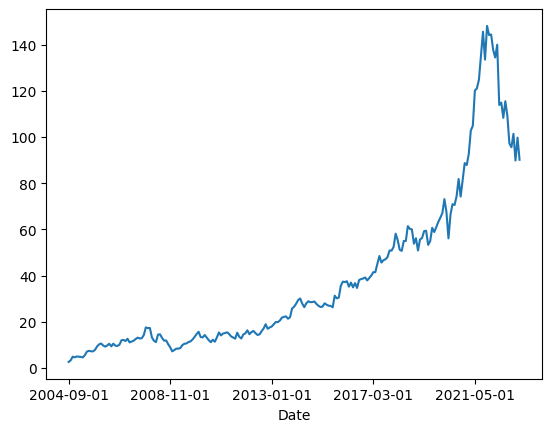

In [ ]:
data.Open.plot()

Here is the graph of the stock of google, I am going to use data before 2019 as the training data, the rest as the test data.

In [ ]:
Y_train = data[:'2019'].iloc[:,0:1]
Y_test = data['2019':].iloc[:,0:1]


In [ ]:
x_train = data[:'2019'].iloc[:,1:]
x_test = data['2019':].iloc[:,1:]

First, the model I proposed is a Linear Regression Model: 
$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5 + \beta_6 X_6 + \beta_7 X_7 + \beta_8 X_8 $
where $X_1$ is the volume of trading for google stock, $X_2$ is the CPI, $X_3$ is the Core CPI, $X_4$ is the GDP, $X_5$ is the unemployment rate, $X_6$ is the m1, $X_7$ is the federal funds rate, $X_8$ is the M2, and $Y$ is the google stock open price.

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(x_train)
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     588.7
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          4.85e-116
Time:                        15:46:29   Log-Likelihood:                -412.69
No. Observations:                 172   AIC:                             843.4
Df Residuals:                     163   BIC:                             871.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -154.8020     60.25

In [ ]:
pred = model.predict(X_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(Y_train, pred)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(Y_train, pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 7.105081745472227
Mean Absolute Error: 2.089995759177739


## Model Interpretation

* The R-squared value is 0.967, which indicates that 96.7% of the variation in Y can be explained by the independent variables in the model. Meanwhile, the MSE and MAE are samll,it suggests a good fit of the model.

* The probability associated with the F-statistic is 4.85e-116, which is very close to 0. This indicates that the null hypothesis (all coefficients are equal to zero) can be rejected, and the model is statistically significant.

* According to the t-test, the significant variables at a 5% significance level are volumne,CPI, unemployment rate, and federal funds rate. While core CPI, GDP, m1 and m2 are not significant.






The model is: $ Y = -154.8 + 6*10^{-10} X_1- 4.08 X_2 + 0.86 X_3 - 0.0024 X_4 -1.71 X_5 - 0.007 X_6 + 2.48 X_7 + 0.005 X_8 $

In [ ]:
X_test = sm.add_constant(x_test)
pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(Y_test, pred)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(Y_test, pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 11778.844690950238
Mean Absolute Error: 89.715012416301


The MSE indicates that the model did not do well for the test data. 

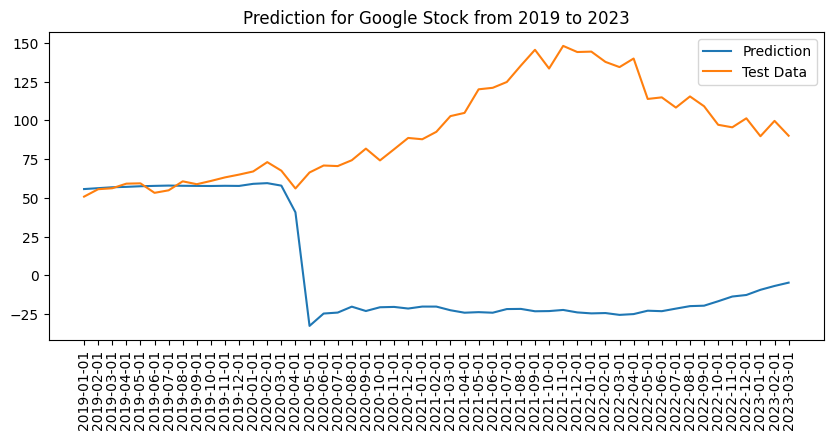

In [ ]:
fig = plt.figure(figsize = (10,4))
pred_df = pd.DataFrame(pred).merge(Y_test,left_index = True,right_index = True)
plt.plot(pred_df.iloc[:,0],label = 'Prediction')
plt.plot(pred_df.iloc[:,1],label = 'Test Data')
plt.title('Prediction for Google Stock from 2019 to 2023')
plt.xticks(rotation=90)
plt.legend()
plt.show()


# Conclusion
The Linear Regression model fits the training data well but not for the test data. This may due to high variance in stock market and high correlation between nearby stock price, for example, today's stock price is highly influenced by yesterday's stock price. That may lead to lower correlation between other variables and the stock price.